IMPORT LIBRERIE

In [1]:
from IPython.display import Image
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, GlobalMaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications import InceptionV3
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
from random import randint
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline


RENAME IMAGES

In [2]:
#rename dei file presenti in Data\\Prepared\\ok per uniformarli

def main():
   
    folder = "..\\Data\\Prepared\\ok"
    for count, filename in enumerate(os.listdir(folder)):
        dst = f"ok{str(count)}.bmp"
        src =f"{folder}/{filename}"  
        dst =f"{folder}/{dst}"

        os.rename(src, dst)
        
if __name__ == '__main__':
    main()

In [3]:
#rename dei file presenti in Data\\Prepared\\nok per uniformarli

def main():
   
    folder = "..\\Data\\Prepared\\nok"
    for count, filename in enumerate(os.listdir(folder)):
        dst = f"nok{str(count)}.bmp"
        src =f"{folder}/{filename}"  
        dst =f"{folder}/{dst}"

        os.rename(src, dst)
        
if __name__ == '__main__':
    main()

SPLIT TRAIN-VALIDATION-TEST

In [4]:
seed=42

In [5]:
#split train
os.chdir('..//Data//Prepared//ok')
if os.path.isdir('..\\train\\ok') is False:
    os.makedirs('..\\train\\ok')
    
    for i in random.Random(seed).sample(glob.glob('ok*'), 400):
        shutil.move(i, '..\\train\\ok')  

os.chdir('..\\..\\..\\Data\\Prepared\\nok')
if os.path.isdir('..\\train\\nok') is False:
    os.makedirs('..\\train\\nok')
    
    for i in random.Random(seed).sample(glob.glob('nok*'), 400):
        shutil.move(i, '..\\train\\nok')  

In [6]:
#split validation
os.chdir('..\\ok')
if os.path.isdir('..\\valid\\ok') is False:
    os.makedirs('..\\valid\\ok')
    
    for i in random.Random(seed).sample(glob.glob('ok*'), 50):
        shutil.move(i, '..\\valid\\ok')  

os.chdir('..\\..\\..\\Data\\Prepared\\nok')
if os.path.isdir('..\\valid\\nok') is False:
    os.makedirs('..\\valid\\nok')
    
    for i in random.Random(seed).sample(glob.glob('nok*'), 50):
        shutil.move(i, '..\\valid\\nok')  

In [7]:
# split test
os.chdir('..\\ok')
if os.path.isdir('..\\test\\ok') is False:
    os.makedirs('..\\test\\ok')
    
    for i in random.Random(seed).sample(glob.glob('ok*'), 50):
        shutil.move(i, '..\\test\\ok')  

os.chdir('..\\..\\..\\Data\\Prepared\\nok')
if os.path.isdir('..\\test\\nok') is False:
    os.makedirs('..\\test\\nok')
    
    for i in random.Random(seed).sample(glob.glob('nok*'), 50):
        shutil.move(i, '..\\test\\nok')  
os.chdir('../../')

In [8]:
#definizione path utilizzati di seguito
train_path = 'Prepared\\train'
valid_path = 'Prepared\\valid'
test_path = 'Prepared\\test'

CHECK GPU

In [9]:
#check GPU per verificarne l'eventuale presenza
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))

Num GPUs Available:  0


PROCESSING IMAGE

In [10]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.inception_v3.preprocess_input) \
.flow_from_directory(directory=train_path, target_size=(299,299), classes=['ok','nok'], batch_size=10)

valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.inception_v3.preprocess_input) \
.flow_from_directory(directory=valid_path, target_size=(299,299), classes=['ok','nok'], batch_size=10)

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.inception_v3.preprocess_input) \
.flow_from_directory(directory=test_path,  target_size=(299,299), classes=['ok','nok'], batch_size=10, shuffle=False)

Found 800 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [11]:
assert train_batches.n == 800
assert valid_batches.n == 100
assert test_batches.n == 100
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2

In [12]:
imgs, labels = next(train_batches)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

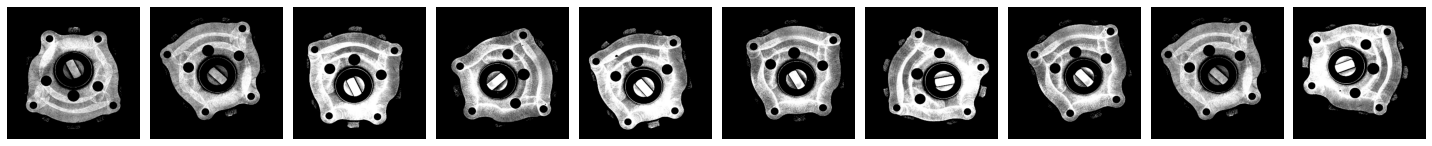

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [13]:
#preparazione immagini di train
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plotImages(imgs)
print(labels)

In [14]:
X_train = train_batches
y_train = train_batches.classes

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

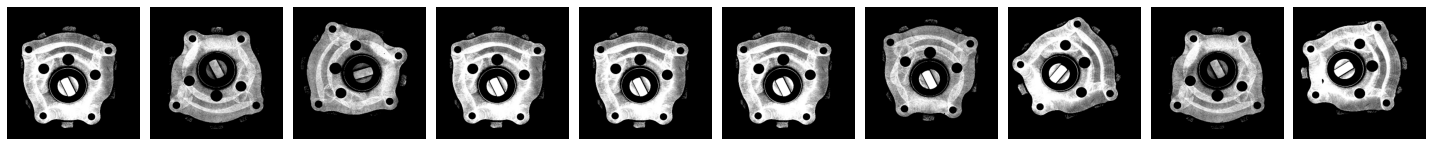

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [15]:
#preparazione immagini validation
valid_imgs, valid_labels = next(valid_batches)
plotImages(valid_imgs)
print(valid_labels)

In [16]:
X_valid = valid_batches
y_valid = valid_batches.classes

In [17]:
test_imgs, test_labels = next(test_batches)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

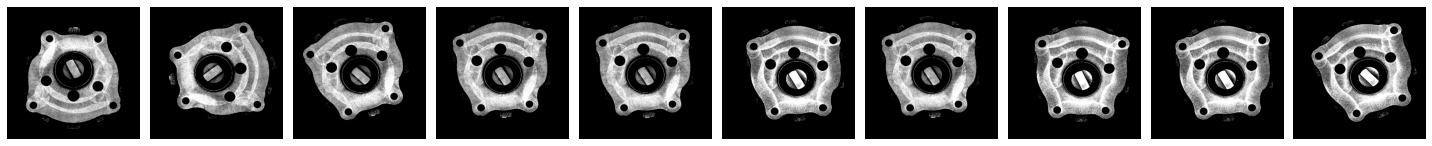

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [18]:
#preparazione immagini test
plotImages(test_imgs)
print(test_labels)

In [19]:
X_test = test_batches
y_test = test_batches.classes

IMPORT E MODIFICA INCEPTION V3

In [20]:
base_model = InceptionV3(input_shape = (299,299, 3), include_top = False, weights = 'imagenet')

In [21]:
for layer in base_model.layers:
    layer.trainable = False

In [22]:
base_model = Sequential()
base_model.add(InceptionV3(include_top=False, weights='imagenet', pooling='max'))
base_model.add(Flatten())
base_model.add(Dense(1024, activation='relu'))
base_model.add(Dropout(0.2))
base_model.add(Dense(2, activation='softmax'))

In [23]:
base_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), loss = 'binary_crossentropy', metrics = ['accuracy'])

TRAINING MODELLO INCEPTION V3

In [25]:
inception_history = base_model.fit(x=X_train, validation_data=X_valid, epochs = 30,verbose=2)

Epoch 1/30
80/80 - 379s - loss: 0.1367 - accuracy: 0.9675 - val_loss: 0.2097 - val_accuracy: 0.9100 - 379s/epoch - 5s/step
Epoch 2/30
80/80 - 362s - loss: 0.1042 - accuracy: 0.9725 - val_loss: 0.0632 - val_accuracy: 0.9900 - 362s/epoch - 5s/step
Epoch 3/30
80/80 - 390s - loss: 0.1002 - accuracy: 0.9787 - val_loss: 0.1920 - val_accuracy: 0.9400 - 390s/epoch - 5s/step
Epoch 4/30
80/80 - 372s - loss: 0.1990 - accuracy: 0.9475 - val_loss: 0.2488 - val_accuracy: 0.9300 - 372s/epoch - 5s/step
Epoch 5/30
80/80 - 352s - loss: 0.1085 - accuracy: 0.9700 - val_loss: 0.1175 - val_accuracy: 0.9700 - 352s/epoch - 4s/step
Epoch 6/30
80/80 - 362s - loss: 0.0973 - accuracy: 0.9762 - val_loss: 0.1326 - val_accuracy: 0.9600 - 362s/epoch - 5s/step
Epoch 7/30
80/80 - 358s - loss: 0.1084 - accuracy: 0.9750 - val_loss: 0.1427 - val_accuracy: 0.9600 - 358s/epoch - 4s/step
Epoch 8/30
80/80 - 351s - loss: 0.0994 - accuracy: 0.9712 - val_loss: 0.1041 - val_accuracy: 0.9800 - 351s/epoch - 4s/step
Epoch 9/30
80/80

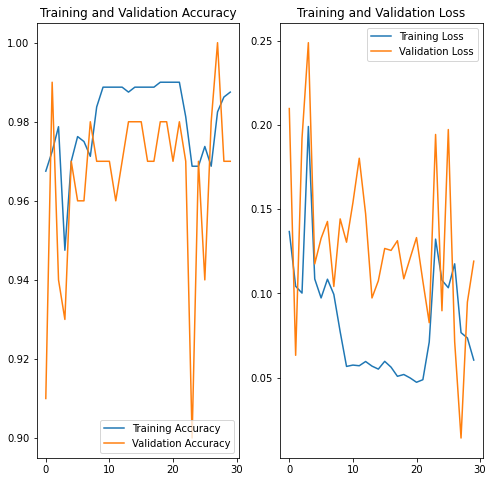

In [26]:
#plot loss e accuracy per train e validation

epochs=30

acc = inception_history.history['accuracy']
val_acc = inception_history.history['val_accuracy']

loss = inception_history.history['loss']
val_loss = inception_history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

SALVATAGGIO MODELLO

In [ ]:
#salvataggio modello in mMdels

model_json = base_model.to_json()
with open("..\\Models\\model.json", "w") as json_file:
    json_file.write(model_json)

base_model.save_weights("..\\Models\\model.h5")
print("Saved model in Models")

Saved model in Models
